# K-means clustering

There are plenty of examples of how to do this online, but I found a lot of the code difficult to read. So, I wrote it up myself!

In [1]:
%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns 
sns.set_context('talk')
sns.set_style('darkgrid')


class Clusters:
    def __init__(self, k, coords):
        self.clusters = self.initialize_clusters(k, coords)
    
    def initialize_clusters(self, k, coords):
        cluster_grps = [[] for _ in range(k)]
        for idx, coord in enumerate(coords):
            cluster_grps[idx % k].append(coord)
        return [Cluster(cluster_grp) for cluster_grp in cluster_grps]

    def update_clusters(self):
        cluster_grps = [[] for _ in range(k)]
        can_terminate = True
        for cluster in self.clusters:
            for point in cluster.points:
                closest = point.closest_cluster(self.clusters)
                if closest != cluster:
                    can_terminate = False
                assignment_idx = self.clusters.index(closest)
                cluster_grps[assignment_idx].append(point.coord)
        self.clusters = [Cluster(cluster_grp) for cluster_grp in cluster_grps]
        return can_terminate
    
    def perform_clustering(self):
        can_terminate = False
        iteration = 0
        while not can_terminate:
            self.visualize('Iteration #{}'.format(iteration))
            can_terminate = self.update_clusters()
            iteration += 1
    
    def visualize(self, title=None):
        for idx, cluster in enumerate(self.clusters):
            cluster.visualize(idx)
        if title:
            plt.title(title)
        plt.legend(loc='best', shadow=True)
        plt.show()


class Cluster:
    def __init__(self, coords):
        self.points = [Point(coord) for coord in coords]
        self.centroid = self.calculate_centroid(self.points)
        
    @classmethod
    def mean(cls, array):
        return sum(array) / len(array)
    
    def calculate_centroid(self, points):
        coords = [point.coord for point in points]
        xs, ys = tuple(zip(*coords))
        centroid_x, centroid_y = Cluster.mean(xs), Cluster.mean(ys)
        return Centroid([centroid_x, centroid_y])
    
    def visualize(self, idx):
        xs, ys = zip(*[point.coord for point in self.points])
        plt.scatter(x=xs, y=ys, label="Cluster #{}".format(idx))

        
class Centroid:
    def __init__(self, coord):
        self.coord = coord
    
    def dist_to_coord(self, coord):
        return ((coord[0] - self.coord[0])**2 + (coord[1] - self.coord[1])**2)**0.5


class Point:
    def __init__(self, coord):
        self.coord = coord
    
    def closest_cluster(self, clusters):
        closest = clusters[0]
        for cluster in clusters[1:]:
            if cluster.centroid.dist_to_coord(self.coord) < closest.centroid.dist_to_coord(self.coord):
                closest = cluster
        return closest     

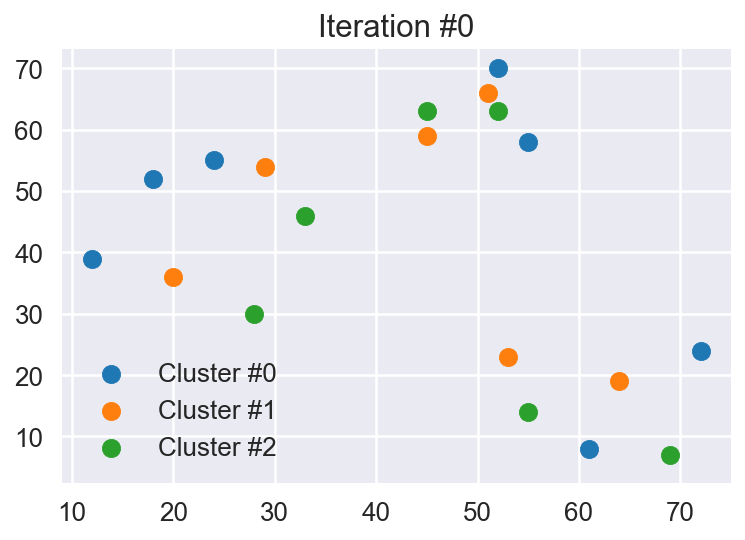

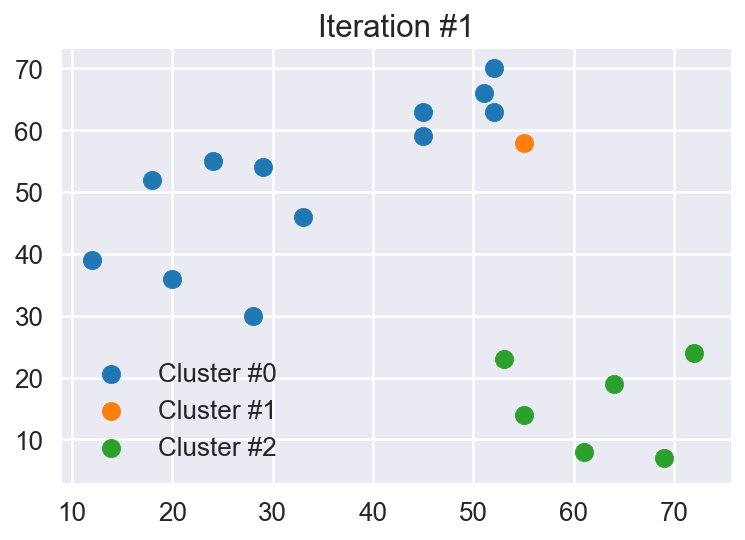

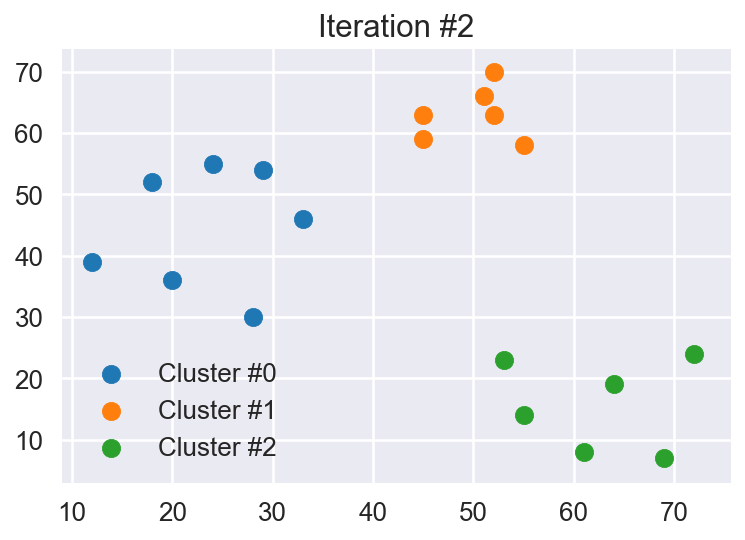

In [2]:
xs = [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72]
ys = [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]
coords = tuple(zip(xs, ys))
k = 3
clusters = Clusters(k, coords)
clusters.perform_clustering()